# Loan Prediction App

# Step - 1 : Understanding Business problem

Problem: To predict if a loan gets approved or not.

# Step-2 : Data Preparation

1. Import

In [148]:
import pandas as pd
df = pd.read_csv("C:/Users/elsy.alex.ennackal/Desktop/dataset/Loan Prediction Dataset.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


2. Clean

Clean nulls

In [149]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [150]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

4 object types and 3 float types are null.

In [151]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [152]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(), inplace=True)

In [153]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Clean duplicates

In [155]:
df[df.duplicated()] # df.drop_duplicates()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


Clean numeric outliers

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


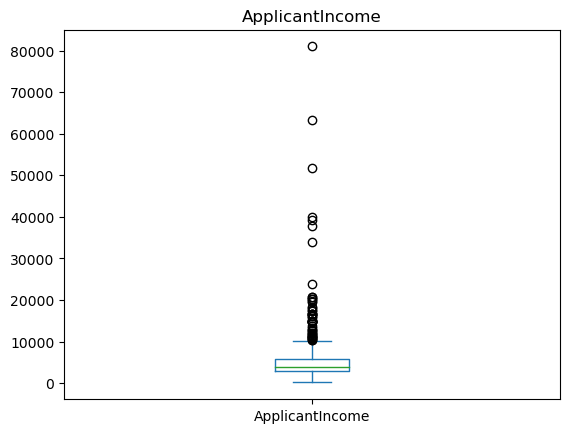

In [156]:
import matplotlib.pyplot as plt   
df['ApplicantIncome'].plot.box(title='ApplicantIncome') 
print(df['ApplicantIncome'].describe())

<AxesSubplot:title={'center':'ApplicantIncome'}>

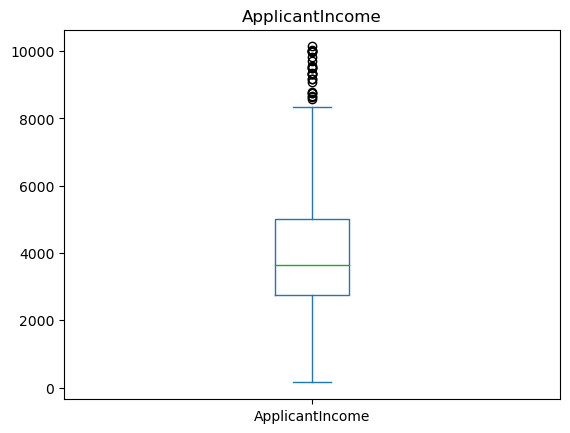

In [157]:
import numpy as np
iqr = np.percentile(df['ApplicantIncome'], 75) - np.percentile(df['ApplicantIncome'], 25)
upper_limit = np.percentile(df['ApplicantIncome'], 75) + 1.5 * iqr
lower_limit = np.percentile(df['ApplicantIncome'], 25) - 1.5 * iqr
df = df[df['ApplicantIncome'] < upper_limit]
df = df[df['ApplicantIncome'] > lower_limit]
df['ApplicantIncome'].plot.box(title='ApplicantIncome') 

count      564.000000
mean      1692.294184
std       2979.232330
min          0.000000
25%          0.000000
50%       1405.500000
75%       2337.000000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


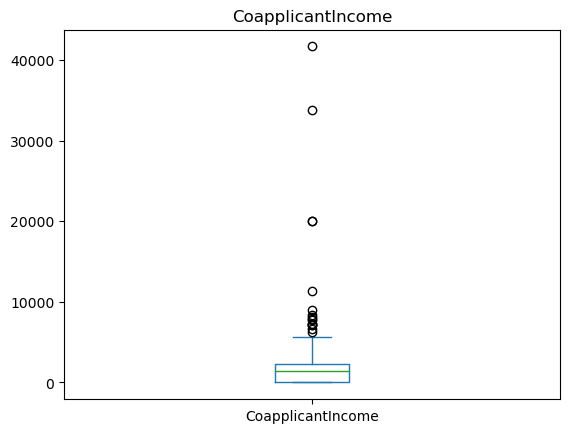

In [158]:
import matplotlib.pyplot as plt   
df['CoapplicantIncome'].plot.box(title='CoapplicantIncome') 
print(df['CoapplicantIncome'].describe())

<AxesSubplot:title={'center':'CoapplicantIncome'}>

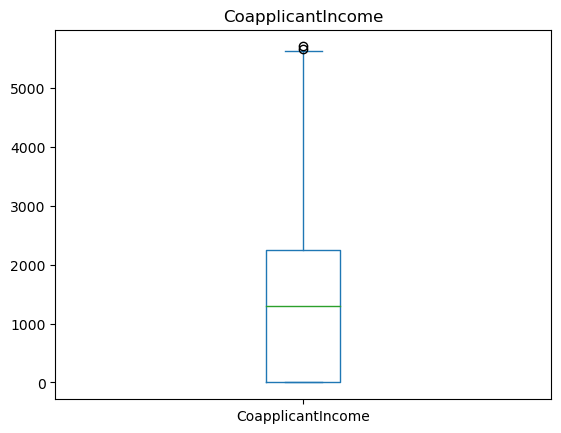

In [159]:
iqr = np.percentile(df['CoapplicantIncome'], 75) - np.percentile(df['CoapplicantIncome'], 25)
upper_limit = np.percentile(df['CoapplicantIncome'], 75) + 1.5 * iqr
lower_limit = np.percentile(df['CoapplicantIncome'], 25) - 1.5 * iqr
df = df[df['CoapplicantIncome'] < upper_limit]
df = df[df['CoapplicantIncome'] > lower_limit]
df['CoapplicantIncome'].plot.box(title='CoapplicantIncome') 

count    548.000000
mean     130.501825
std       51.565528
min        9.000000
25%      100.000000
50%      125.000000
75%      155.000000
max      376.000000
Name: LoanAmount, dtype: float64


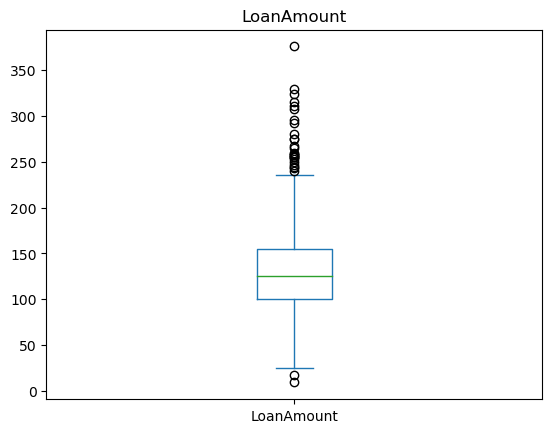

In [160]:
import matplotlib.pyplot as plt   
df['LoanAmount'].plot.box(title='LoanAmount') 
print(df['LoanAmount'].describe())

<AxesSubplot:title={'center':'LoanAmount'}>

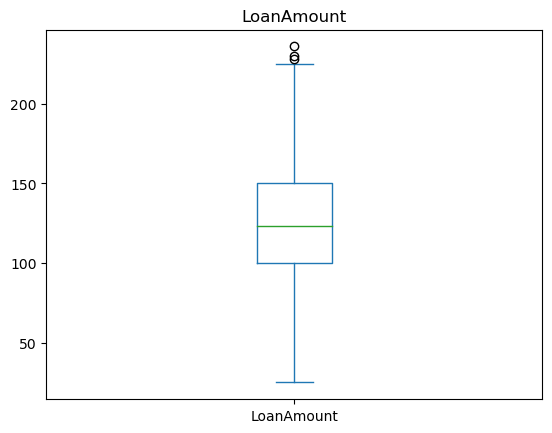

In [93]:
iqr = np.percentile(df['LoanAmount'], 75) - np.percentile(df['LoanAmount'], 25)
upper_limit = np.percentile(df['LoanAmount'], 75) + 1.5 * iqr
lower_limit = np.percentile(df['LoanAmount'], 25) - 1.5 * iqr
df = df[df['LoanAmount'] < upper_limit]
df = df[df['LoanAmount'] > lower_limit]
df['LoanAmount'].plot.box(title='LoanAmount') 

count    548.000000
mean     343.029197
std       64.735879
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64


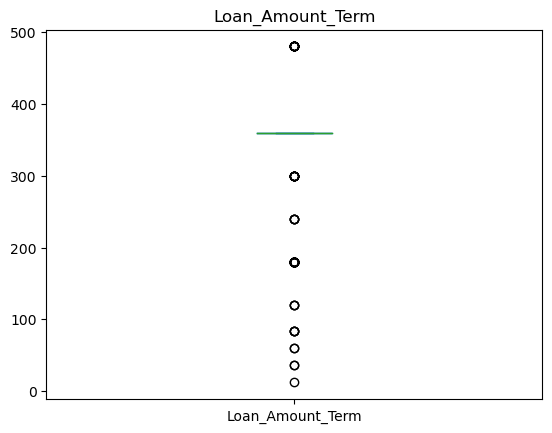

In [161]:
import matplotlib.pyplot as plt   
df['Loan_Amount_Term'].plot.box(title='Loan_Amount_Term') 
print(df['Loan_Amount_Term'].describe())

count    548.000000
mean       0.855839
std        0.351573
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64


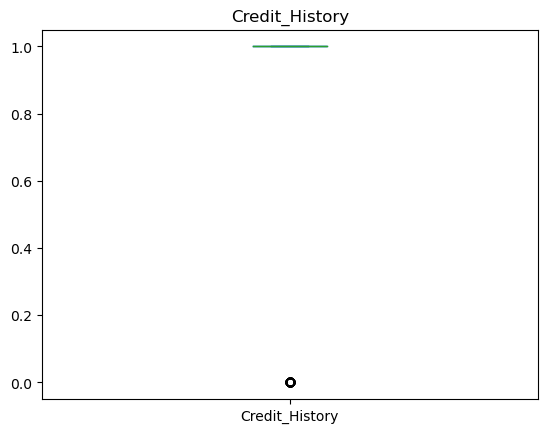

In [162]:
import matplotlib.pyplot as plt   
df['Credit_History'].plot.box(title='Credit_History') 
print(df['Credit_History'].describe())

3. Transform

Transform numerics

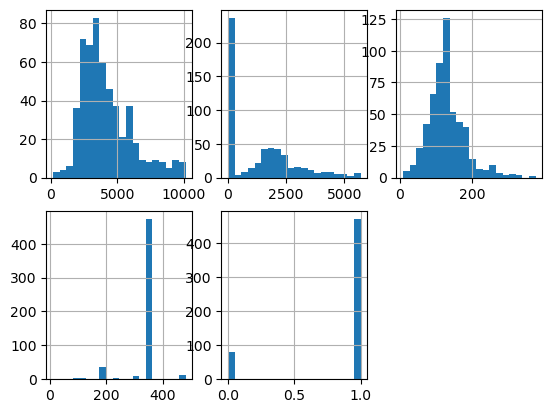

In [163]:
plt.subplot(231)
df['ApplicantIncome'].hist(bins=20) 
plt.subplot(232)
df['CoapplicantIncome'].hist(bins=20)  
plt.subplot(233)
df['LoanAmount'].hist(bins=20) 
plt.subplot(234)
df['Loan_Amount_Term'].hist(bins=20)
plt.subplot(235)
df['Credit_History'].hist(bins=20)
plt.show()

Transform non-numerics

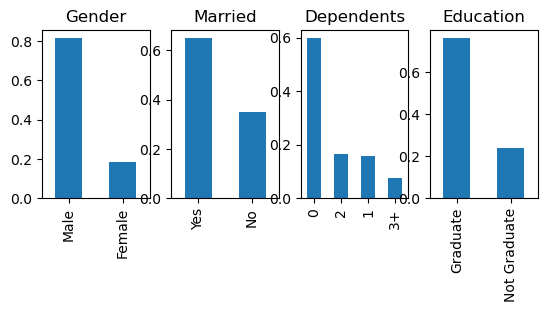

In [164]:
plt.subplot(241)
df['Gender'].value_counts(normalize=True).plot.bar(title='Gender') 
plt.subplot(242)
df['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(243)
df['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents') 
plt.subplot(244)
df['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.show()

<AxesSubplot:title={'center':'Loan_Status'}>

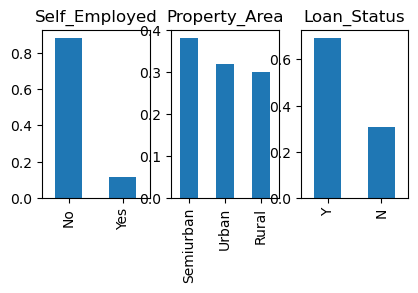

In [165]:
plt.subplot(245)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(246) 
df['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.subplot(247) 
df['Loan_Status'].value_counts(normalize=True).plot.bar(title= 'Loan_Status') 

In [166]:
from sklearn.preprocessing import LabelEncoder
obj=LabelEncoder()
df['Gender']  = obj.fit_transform(df['Gender'])
df['Married']  = obj.fit_transform(df['Married'])
df['Dependents']  = obj.fit_transform(df['Dependents'])
df['Education']  = obj.fit_transform(df['Education'])
df['Self_Employed']  = obj.fit_transform(df['Self_Employed'])
df['Property_Area']  = obj.fit_transform(df['Property_Area'])
df['Loan_Status']  = obj.fit_transform(df['Loan_Status'])

In [167]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,LP001014,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
10,LP001024,1,1,2,0,0,3200,700.0,70.0,360.0,1.0,2,1


4. Feature Selection

In [168]:
df=df.drop('Loan_ID',axis=1) 

# Step-3 : EDA

Univariate Analysis is already done

Bivariate Analysis:

<AxesSubplot:xlabel='Property_Area'>

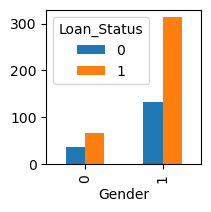

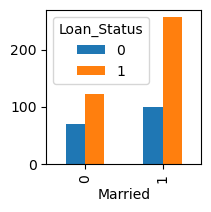

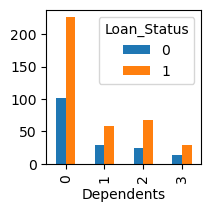

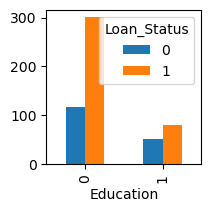

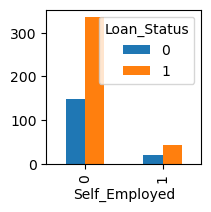

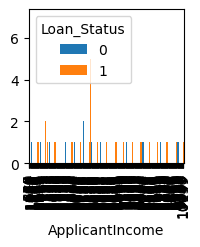

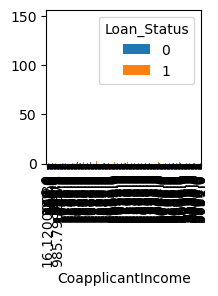

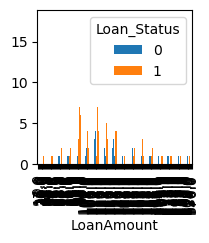

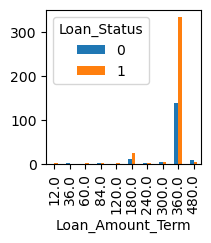

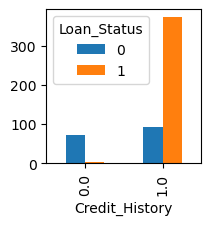

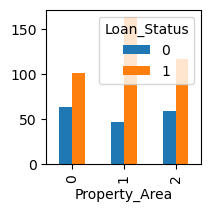

In [169]:
pd.crosstab(df['Gender'],df['Loan_Status']).plot(kind="bar", figsize=(2,2))
pd.crosstab(df['Married'],df['Loan_Status']).plot(kind="bar", figsize=(2,2))
pd.crosstab(df['Dependents'],df['Loan_Status']).plot(kind="bar", figsize=(2,2))
pd.crosstab(df['Education'],df['Loan_Status']).plot(kind="bar", figsize=(2,2))
pd.crosstab(df['Self_Employed'],df['Loan_Status']).plot(kind="bar", figsize=(2,2))
pd.crosstab(df['ApplicantIncome'],df['Loan_Status']).plot(kind="bar", figsize=(2,2))
pd.crosstab(df['CoapplicantIncome'],df['Loan_Status']).plot(kind="bar", figsize=(2,2))
pd.crosstab(df['LoanAmount'],df['Loan_Status']).plot(kind="bar", figsize=(2,2))
pd.crosstab(df['Loan_Amount_Term'],df['Loan_Status']).plot(kind="bar", figsize=(2,2))
pd.crosstab(df['Credit_History'],df['Loan_Status']).plot(kind="bar", figsize=(2,2))
pd.crosstab(df['Property_Area'],df['Loan_Status']).plot(kind="bar", figsize=(2,2))

Correlation Analysis:

In [170]:
df.corr().style.background_gradient(cmap="Blues")

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.371048,0.187957,0.067799,0.026313,0.079568,0.206267,0.148877,-0.076701,0.005893,-0.005822,0.041203
Married,0.371048,1.000000,0.335417,0.025988,0.016951,-0.001219,0.250139,0.167001,-0.086958,0.003497,0.023613,0.084109
Dependents,0.187957,0.335417,1.000000,0.079744,0.073366,0.125094,-0.067985,0.103169,-0.090496,-0.031572,0.014138,0.020233
Education,0.067799,0.025988,0.079744,1.000000,-0.003987,-0.163515,-0.041492,-0.148719,-0.076792,-0.086666,-0.063284,-0.109865
Self_Employed,0.026313,0.016951,0.073366,-0.003987,1.000000,0.195669,-0.042105,0.103878,-0.060605,0.019836,-0.059868,-0.004677
ApplicantIncome,0.079568,-0.001219,0.125094,-0.163515,0.195669,1.000000,-0.221291,0.520254,-0.049276,0.053022,-0.079783,0.003490
CoapplicantIncome,0.206267,0.250139,-0.067985,-0.041492,-0.042105,-0.221291,1.000000,0.333191,-0.001672,0.005422,-0.082061,0.058402
LoanAmount,0.148877,0.167001,0.103169,-0.148719,0.103878,0.520254,0.333191,1.000000,0.097151,0.016704,-0.098006,-0.027633
Loan_Amount_Term,-0.076701,-0.086958,-0.090496,-0.076792,-0.060605,-0.049276,-0.001672,0.097151,1.000000,-0.016121,-0.079854,-0.026135
Credit_History,0.005893,0.003497,-0.031572,-0.086666,0.019836,0.053022,0.005422,0.016704,-0.016121,1.000000,0.017085,0.560916


# Step -4 : Data Modeling

In [171]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X = df.drop('Loan_Status', axis=1)
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2


In [172]:
y=df['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Step - 5 : Evaluate

In [173]:
print('Accuracy:', clf.score(X_test, y_test))

Accuracy: 0.7272727272727273


In [179]:
clf.predict(np.asarray([1,1,1,1,1,4000,1500,100,360,1,2]).reshape(1,-1))

C:\Users\elsy.alex.ennackal\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])